# Interpreting estimated coefficients exercise

### Exercise 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

- We arent given the statistical significance of the coefficients. We need t-statistics or associated p-values for the coefficients to determine if the coefficients are statistically significant or not. If they are statistically insignificant, we should consider them as zero. 
- Assuming that all the estimated coefficients are statistically significant, we can interpret the model as follows: The bias term is 873. Interpreting it is difficult because of the reasons we mentioned in the checkpoint. So, we just say that it is the bias term. On average, the families with children spend 223.57 less than the families without a child. The relation between the recreation expenditure and the income is quadratic. An increase of 1000 in annual income not only increase the recreation expenditure by 1.2 but also an additional 0.02 X annual income. This second piece comes from the relation between the recreation expenditure and the square of the annual income. Notice that we expressed this second part as 0.02 X annual income. This is because of the fact that the exact value depends on the level of income! Since the relationship is quadratic, the magnitude of the second term increases as the level of X increases. The graph below demonstrates the relation between the annual reacreation expenditure and the annual income seperately for the families with children and without children.

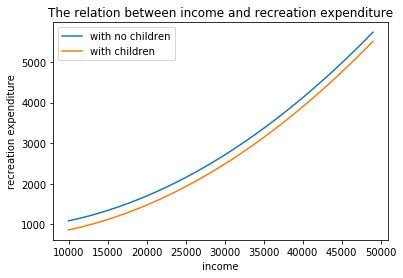

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# X represents annual income
X = np.arange(10000, 50000, 1000)
# Y represents annual expenditure on recreation
# for families with no children
Y = 873 + 0.0012*X + 0.000002*(X**2)
# Y_kids represents annual expenditure on recreation
# for families with children
Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="with no children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure")
plt.legend()
plt.show()

### Exercise 2: Weather model

* Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables? 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [6]:
weather.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [10]:
# Target variable: difference between apparenttemperature and temperature
Y = weather['apparenttemperature'] - weather['temperature']

# Feature set
X = weather[['humidity','windspeed']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:27:31   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- All of the estimated coefficients are statistically significant as their p-values are way less than 0.05.
- We can expect that as humidity increases the difference between the apparent temperature and the temperature also increases. However, according to our estimations the sign of the coefficient of the humidity is negative. We may also expect that the difference of the apparent tempereture and the temperature negatively related with the wind speed as our estimation says so.
- According to the estimated model, 1 point increase in the humidity results in 3.03 points decrease in the target. 1 point increase in the windspeed is associated with 0.12 point decrease in our target.

Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients

In [13]:
# Engineering a feature called humidity_windspeed_interaction:
weather['humidity_windspeed_interaction'] = weather.humidity * weather.windspeed

# Y is the target variable
Y = weather['apparenttemperature'] - weather['temperature']
# X is the feature set
X = weather[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        16:30:42   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Similar to the previous model, all of the coefficients are statistically significant as their p-values are less than 0.05.
- Signs of the both humidity and windspeed changed from negative to the positive when we include the intereaction term.
- According to the model, 1 point increase in the humidity and windspeed results in 0.18 and 0.09 point increases in the target respectively.
- According to the model, the coefficient of the interaction term is -0.30. We can interpret it as follows. Given a windspeed level, 1 point increase in humidity results in 0.18 - 0.30 X windspeed point increase in the target. This means that the increase in the target is lower for high values of windspeed than for low values of windspeed. So, the windspeed mitigates the effect of humidity increase on the target. Similarly for a given humidity level, 1 point increase in the windspeed results in 0.09 - 0.30 X humidity point increase in the target. So, the humidity also mitigates the effect of windspeed on the target.

### Exercise 3: House prices model



In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from scipy import stats
from sklearn import linear_model
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [15]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?

In [16]:
# first, organizing the numerical and non-numerical data:
# Numerical features:
numerical = house_prices_df.dtypes[house_prices_df.dtypes != "object"].index
numerical.ravel()

# Non-numerical features:
non_numerical = house_prices_df.dtypes[house_prices_df.dtypes == "object"].index
non_numerical.ravel()

array(['mszoning', 'street', 'alley', 'lotshape', 'landcontour',
       'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating',
       'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish',
       'garagequal', 'garagecond', 'paveddrive', 'poolqc', 'fence',
       'miscfeature', 'saletype', 'salecondition'], dtype=object)

In [17]:
# Make a copy of the orginal df to work with
house_prices_df2 = house_prices_df.copy()

# converting all non-numerical columns to numerical, by one-hot encoding them
# this will make the whole house_prices_df2 have continuous features
for variable in non_numerical:
    house_prices_df2 = pd.concat([house_prices_df, pd.get_dummies(house_prices_df2[variable], prefix=variable, drop_first=True)], axis=1)
    
    

In [19]:
# Finding the top 10 most correlated features:

np.abs(house_prices_df2.corr().loc[:,'saleprice']).sort_values(ascending=False).head(10).index


Index(['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt'],
      dtype='object')

In [20]:


X = house_prices_df2[['overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt']]

# target is saleprice
Y = house_prices_df2.saleprice

import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     540.3
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:21:54   Log-Likelihood:                -17470.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1450   BIC:                         3.501e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.585e+05   9.15e+04     -8.294      0.000   -9.38e+05   -5.79e+05
overallqual   2.092e+04   1164.267     17.971      0.000    1.86e+04    2.32e+04
grlivarea       51.3679      4.263     12.051      0.000      43.006      59.730
garagecars    1.063e+04   3065.576      3.469      0.001    4620.797    1.66e+04
garagearea      14.5088     10.384      1.397      0.163      -5.861      34.879
totalbsmtsf     19.2466      4.324      4.451      0.000      10.765      27.728
firstflrsf      13.9481      4.965      2.810      0.005       4.210      23.687
fullbath     -5410.3114   2684.921     -2.015      0.044   -1.07e+04    -143.567
totrmsabvgrd   -86.6391   1126.726     -0.077      0.939   -2296.827    2123.549
yearbuilt      345.3629     47.886      7.212      0.000     251.430     439.295
==============================================================================
Omnibus:                      470.067   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52956.991
Skew:                          -0.413   Prob(JB):                         0.00
Kurtosis:                      32.493   Cond. No.                     2.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistically significant variables are *overallqual, grlivarea, garagecars, totalbsmtsf, firstflrsf, fullbath, yearbuilt* 

The other variables are statistically insignificant, and we will re-estimate the model without them:

In [21]:

# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'yearbuilt']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     694.4
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        17:27:20   Log-Likelihood:                -17471.
No. Observations:                1460   AIC:                         3.496e+04
Df Residuals:                    1452   BIC:                         3.500e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.626e+05   9.06e+04     -8.413      0.000    -9.4e+05   -5.85e+05
overallqual  2.091e+04   1161.598     18.001      0.000    1.86e+04    2.32e+04
grlivarea      51.5215      3.119     16.521      0.000      45.404      57.639
garagecars   1.405e+04   1829.333      7.683      0.000    1.05e+04    1.76e+04
totalbsmtsf    19.7871      4.298      4.604      0.000      11.357      28.217
firstflrsf     14.4130      4.953      2.910      0.004       4.696      24.130
fullbath    -5834.2754   2646.557     -2.204      0.028    -1.1e+04    -642.792
yearbuilt     347.2556     47.663      7.286      0.000     253.760     440.751
==============================================================================
Omnibus:                      454.215   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48784.576
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                      31.310   Cond. No.                     2.71e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


The results resemble the previous model's results. The estimated coefficients are close to the previous model except the dummy variables. The coefficients of the dummies changed relatively larger than the other variables.